In [1]:
import numpy as np
import netCDF4 as nc
import sys,os

#import pandas as pd
from imogen import data_info
#import iris
#import iris.plot as iplt
#import iris.quickplot as qplt

from PlotTools import plot_tools as PTs

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline


In [2]:
GtC_to_ppm=0.471
ppm_to_kgC = 1e12/GtC_to_ppm


Tile_names=data_info.TILE_short_names()
Tile_colours = data_info.TILE_colours()
nTiles=len(Tile_names)


In [3]:
CONFIG= 'PRE_INDUSTRIAL'  #'METHANE_FEEDBACK'  #  

DATA_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/'+CONFIG+'/'
PLOT_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/plots/Cveg_Bias/'

os.system('mkdir '+PLOT_DIR)


256

In [4]:
ANCILS_DIR='/prj/CLIFFTOP/COMMON_DATA/ANCILS/'
GRID_file= ANCILS_DIR+'grid_info.nc'
grinf=nc.Dataset(GRID_file,'r')
lats_2d = grinf.variables['latitude'][:]
lons_2d = grinf.variables['longitude'][:]
Area_2d = grinf.variables['Area'][:]
land_index = grinf.variables['land_index'][:]
grinf.close()

AREA_file=ANCILS_DIR+'Area_in_iris_format.nc'
Ainf=nc.Dataset(AREA_file,'r')
AREA_1D = Ainf.variables['area'][:]
Ainf.close()

# soil layer thicknesses
#dz_soil= np.array([0.05,0.08408964,0.11397535,0.14142136,0.16718508,0.19168293,
#                   0.21517585,0.23784142,0.25980762,0.28117066,0.30200527,
#                   0.32237098,0.34231625,0.36188121])
#dweight_soil = dz_soil/np.sum(dz_soil)
#print(np.sum(dweight_soil))
#print(dweight_soil)

tiles= data_info.TILE_short_names


In [5]:

OBS_DIR  = '/prj/CLIFFTOP/PreIndustrialLandCover/'
OBS_list = ['hyde','hh','rf']
OBS_FILES = [ OBS_DIR+obs.upper()+'_AREAVEG/land-cover_'+obs+'_landcover_yr1850.nc' for obs in OBS_list ]
nOBS = len(OBS_list)

OBS_LCtypes = ['TrpEBF','TrpDBF','TmpEBF','TmpDBF',
               'SecTrpEBF','SecTrpDBF','SecTmpEBF','SecTmpDBF',
               'TmpENF','BorENF','BorDNF',
               'SecTmpENF','SecBorENF','SecBorDNF',
               'C3grass','C4grass',
               'Savanna',
               'C3crop','C4crop','C3past','C4past',
               'Denseshrub','Openshrub',
               'Tundra','Desert',
               'PdRI','Water','Urban',
              ]

OBS_LCgroups = ['BL-Tree','NL-Tree','Natural-Grasses','Agricultural-Grasses','Shrub','Soil','Savanna']
OBS_LCgroups_locs = [ range(0,8), range(8,14), range(14,16), range(17,21), range(21,23), [23,24], [16] ]
nGROUPS = len(OBS_LCgroups)
OBS_DICT = {}
for iobs in range(nOBS):
    OBS_DICT[OBS_list[iobs]]={}
    print(OBS_FILES[iobs])
    inf=nc.Dataset(OBS_FILES[iobs])
    if iobs==0:
        OBS_lat=inf.variables['latitude'][:]
        OBS_lon=inf.variables['longitude'][:]
        OBS_area=inf.variables['Grid_area'][:]
        
    nlats,nlons=len(inf.dimensions['latitude']),len(inf.dimensions['longitude'])
    for iGRP in range(nGROUPS):
        print(iGRP,OBS_LCgroups[iGRP])
        temp_data = np.zeros([nlats,nlons])
        for iLC in OBS_LCgroups_locs[iGRP]:
            indata = inf.variables[OBS_LCtypes[iLC]][:].squeeze()
            indata[indata<0.]=0.
            indata*=inf.variables[OBS_LCtypes[iLC]].scale_factor
            temp_data+=indata
            #print('     ',iLC, OBS_LCtypes[iLC])
            
        OBS_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]]=np.copy(temp_data)
        
    inf.close()

# Change OBS_LON to -180->180; don't need to rejig the data as this is just for indexing
OBS_lon[OBS_lon>180]-=360.
    

/prj/CLIFFTOP/PreIndustrialLandCover/HYDE_AREAVEG/land-cover_hyde_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna
/prj/CLIFFTOP/PreIndustrialLandCover/HH_AREAVEG/land-cover_hh_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna
/prj/CLIFFTOP/PreIndustrialLandCover/RF_AREAVEG/land-cover_rf_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna


In [6]:
dumpfile = DATA_DIR+'EQUI_CEN_MOHC_MOD_HadGEM2-ES_0equi.dump.18500101.0.nc'
runfile  = DATA_DIR+'EQUI_CEN_MOHC_MOD_HadGEM2-ES_0equi.Annual_carbon.1850.nc'

PD_runfile  = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/' +  \
                'CEN_MOHC_MOD_HadGEM2-ES/EQUI_CEN_MOHC_MOD_HadGEM2-ES_presentday.Annual_carbon.2015.nc'

#dinf=nc.Dataset(dumpfile,'r')
#PI_frac = dinf.variables['frac'][:]
#PI_lat  = dinf.variables['latitude'][:]
#PI_lon  = dinf.variables['longitude'][:]
#PI_cvtot= dinf.variables['cv'][:]
#dinf.close()

rinf = nc.Dataset(runfile,'r')
PI_lat  = rinf.variables['latitude'][:].squeeze()
PI_lon  = rinf.variables['longitude'][:].squeeze()
PI_cv   = rinf.variables['c_veg'][:].squeeze()
PI_cvtot= rinf.variables['cv'][:].squeeze()
PI_frac = rinf.variables['frac'][:].squeeze()
rinf.close()


PDrinf = nc.Dataset(PD_runfile)
PD_lat  = PDrinf.variables['latitude'][:].squeeze()
PD_lon  = PDrinf.variables['longitude'][:].squeeze()
PD_cv   = PDrinf.variables['c_veg'][:].squeeze()
PD_cvtot= PDrinf.variables['cv'][:].squeeze()
PD_frac = PDrinf.variables['frac'][:].squeeze()
PDrinf.close()

nJpts  = PI_frac.shape[1]
nTiles = PI_frac.shape[0]
nPFTs = PI_cv.shape[0]



In [7]:
JULES_LCgroups = OBS_LCgroups
JULES_LCgroups_locs = [ [0,1,2], [3,4],[5,8],[6,7,9,10],[11,12],[15],[-999] ]
nGROUPS = len(OBS_LCgroups)

JULES_FRAC_DICT = {}
JULES_CV_DICT   = {}
JULES_absCV_DICT= {}

for iGRP in range(nGROUPS):
    group = JULES_LCgroups[iGRP]
    print(group)
    temp_frac_data=np.zeros(nJpts)
    temp_cv_data=np.zeros(nJpts)
    for itile in JULES_LCgroups_locs[iGRP]:
        if itile!=-999:
            temp_frac_data+=PI_frac[itile,:].squeeze()
            if itile <=12:
                temp_cv_data+=(PI_cv[itile,:].squeeze()*PI_frac[itile,:].squeeze())
    
    JULES_absCV_DICT[group]=np.copy(temp_cv_data)
    JULES_FRAC_DICT[group]=np.copy(temp_frac_data)

    temp_cv_data[temp_frac_data>0.]/=temp_frac_data[temp_frac_data>0.]
    
    JULES_CV_DICT[group]=np.copy(temp_cv_data)
    
JULES_CV_DICT['Savanna']= (0.9*JULES_CV_DICT['Natural-Grasses'])+(0.1*JULES_CV_DICT['BL-Tree'])


BL-Tree
NL-Tree
Natural-Grasses
Agricultural-Grasses
Shrub
Soil
Savanna


In [8]:
JULES_CV_DICT['Savanna']

array([ 0.31416718,  0.84148037,  0.16502585, ...,  0.16051535,
        0.16051535,  0.16051535])

In [9]:

OBS_FRAC_DICT = { LC:np.zeros_like(JULES_FRAC_DICT[LC]) for LC in JULES_FRAC_DICT }

print(JULES_FRAC_DICT['BL-Tree'].max())
print(OBS_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]].max())

0.902873443123
1.0


In [10]:
print(PI_lat.shape)

(1631,)


In [11]:
# Get Obs Data on to JULES-IMOGEN Grid
#print(PI_lon)
#print(OBS_lon.shape)
lat_inc=2.5
lon_inc=3.75


OBS_FRAC_DICT = { obs: { LC:np.zeros_like(JULES_FRAC_DICT[LC]) for LC in JULES_FRAC_DICT }
                   for obs in OBS_list }

bad_pts=[]
for ipt in range(nJpts):  #[0,1]: #
    Jlat,Jlon=PI_lat[ipt],PI_lon[ipt]
    #print(Jlat,Jlon)
    OBS_ypts = np.where((OBS_lat>=Jlat)&(OBS_lat<Jlat+lat_inc))[0]
    OBS_xpts = np.where((OBS_lon>=Jlon)&(OBS_lon<Jlon+lon_inc))[0]
    #print(OBS_ypts)
    #print(OBS_xpts)
    
    ymin,ymax = OBS_ypts.min(),OBS_ypts.max()
    xmin,xmax = OBS_xpts.min(),OBS_xpts.max()
    
    for iobs in range(nOBS):
        temp_total=0.0
        for iGRP in range(nGROUPS):
            
            temp_data=OBS_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ymin:ymax+1,xmin:xmax+1]
            #print(temp_data)
            temp_data=np.sum(temp_data)
            #print(temp_data)
                #print('     ',iLC, OBS_LCtypes[iLC])
            OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ipt]=np.copy(temp_data)
            
            temp_total+=temp_data
            
        #print(np.max(OBS_FRAC_DICT[OBS_list[iobs]][group]))
        
        #print(temp_total)
        if temp_total<1.:
            bad_pts.append(ipt)
            #print(ipt,Jlat,Jlon,temp_total)
        
        if temp_total>0.1:
            for iGRP in range(nGROUPS):
                #print(iGRP,OBS_LCgroups[iGRP])
                #print(OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ipt])
                OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ipt]/=temp_total
                #print(OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]])
                #print(OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ipt])
        else:
            for iGRP in range(nGROUPS):
                OBS_FRAC_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]][ipt]=0.

for iGRP in range(nGROUPS):
    group=OBS_LCgroups[iGRP]
    print(group)
    print(np.max(OBS_FRAC_DICT[OBS_list[iobs]][group]))

BL-Tree
1.0
NL-Tree
1.0
Natural-Grasses
0.999137522538
Agricultural-Grasses
0.906903026598
Shrub
0.997425738513
Soil
1.0
Savanna
1.0


In [12]:
for iGRP in range(nGROUPS):
    group=OBS_LCgroups[iGRP]
    print(group)
    print('    ',np.sum(OBS_DICT['hyde'][group]*OBS_area))
    print('    ',np.sum(OBS_FRAC_DICT['hyde'][group]*AREA_1D))
    print('    ',np.sum(JULES_FRAC_DICT[group]*AREA_1D))
    

BL-Tree
     2.59671789926e+13
     2.602198134e+13
     3.06444419938e+13
NL-Tree
     1.53668806912e+13
     1.59868166874e+13
     1.88377349325e+13
Natural-Grasses
     2.04486854196e+13
     2.0266944099e+13
     1.60863594062e+13
Agricultural-Grasses
     1.23278780634e+13
     1.21519481507e+13
     7.41675974348e+12
Shrub
     1.73365226601e+13
     1.67405449297e+13
     9.43086175594e+12
Soil
     2.40291955246e+13
     2.54355658367e+13
     4.59621116991e+13
Savanna
     1.36029624664e+13
     1.36826157931e+13
     0.0


In [13]:
print(AREA_1D)
print(OBS_FRAC_DICT['hyde']['BL-Tree'])

[[[  6.85365658e+10   7.25482291e+10   7.64224553e+10 ...,   1.26185021e+10
     1.26185021e+10   1.26185021e+10]]]
[ 0.          0.00361353  0.00138729 ...,  0.          0.          0.        ]


In [14]:
OBS_absCV_DICT = { obs: { group: np.zeros_like(JULES_CV_DICT[group]) for group in JULES_LCgroups} 
               for obs in OBS_list}

for obs in OBS_list:
    print(obs)
    for iGRP in range(nGROUPS):
        group=OBS_LCgroups[iGRP]
        print(group)
        OBS_absCV_DICT[obs][group]=JULES_CV_DICT[group]*OBS_FRAC_DICT[obs][group]
        
    
    


hyde
BL-Tree
NL-Tree
Natural-Grasses
Agricultural-Grasses
Shrub
Soil
Savanna
hh
BL-Tree
NL-Tree
Natural-Grasses
Agricultural-Grasses
Shrub
Soil
Savanna
rf
BL-Tree
NL-Tree
Natural-Grasses
Agricultural-Grasses
Shrub
Soil
Savanna


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


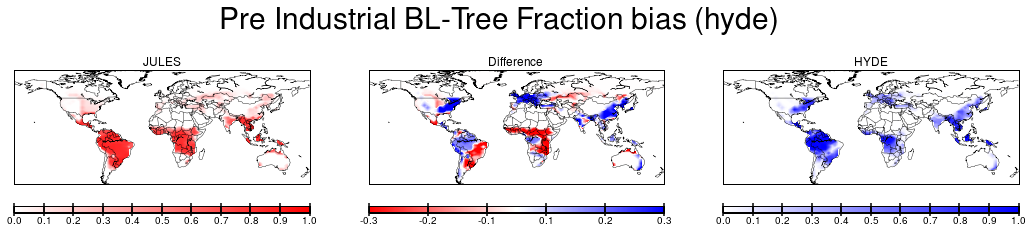

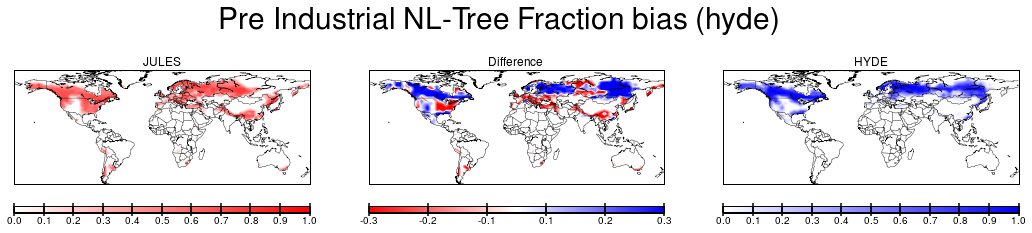

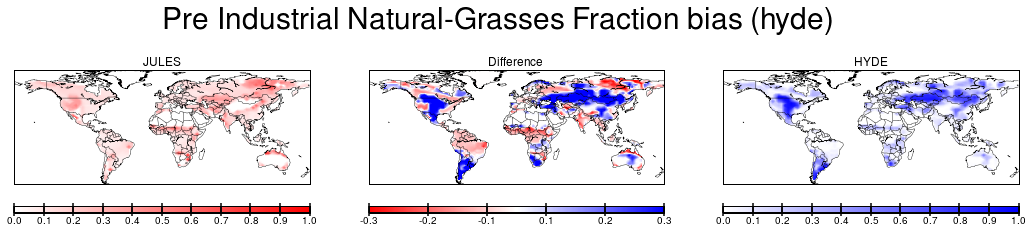

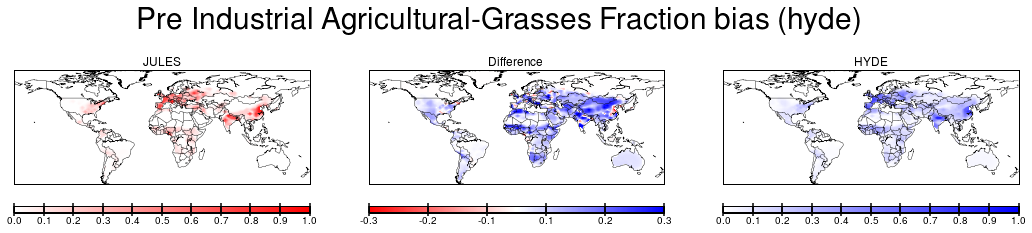

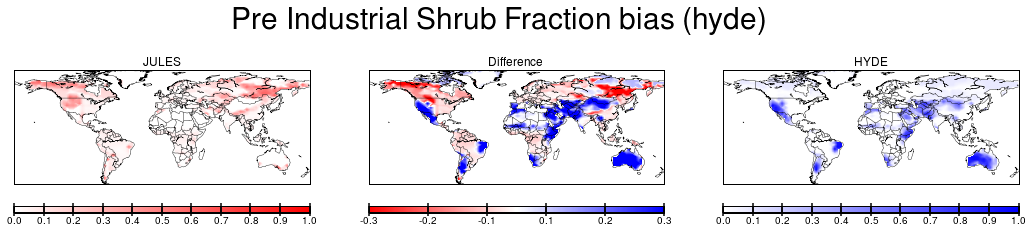

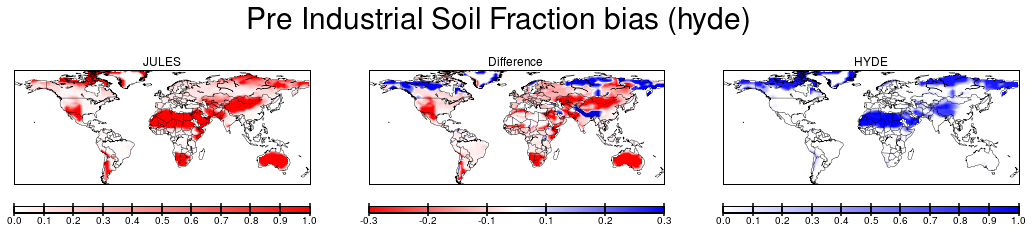

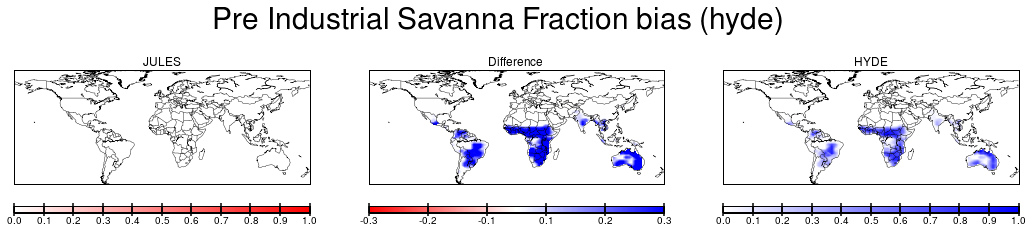

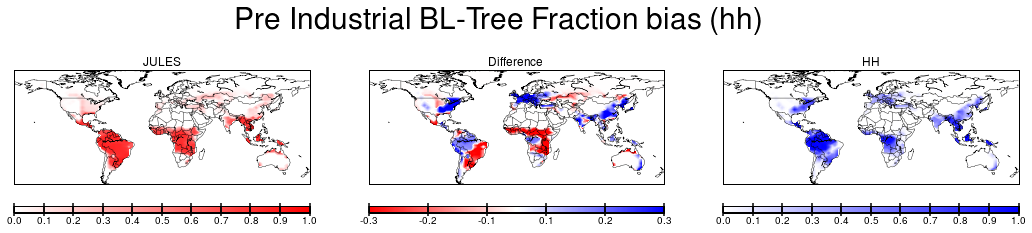

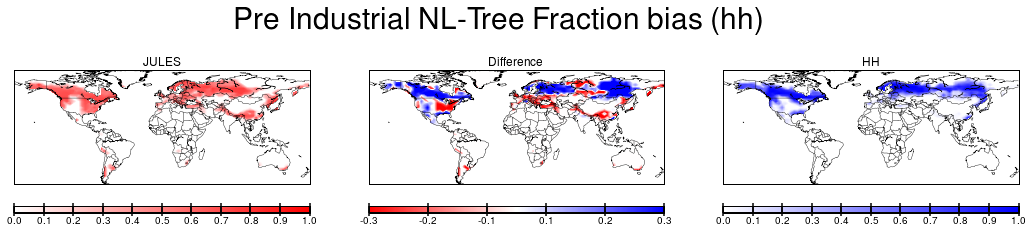

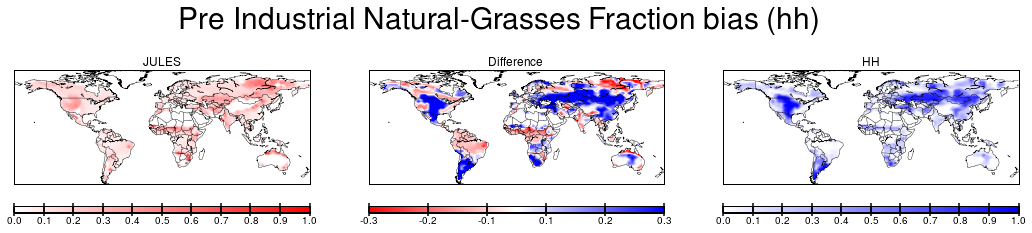

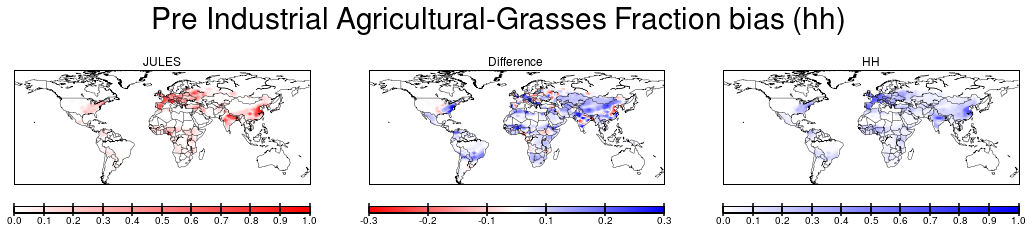

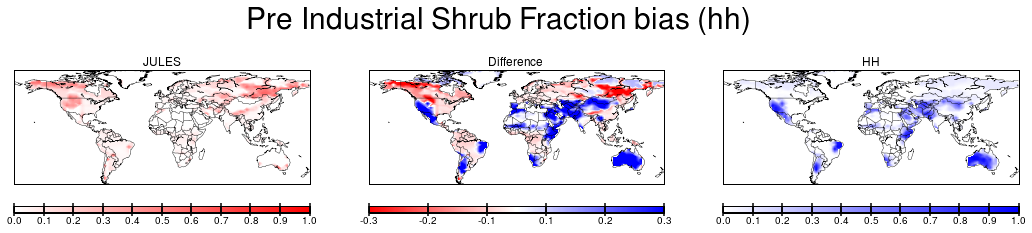

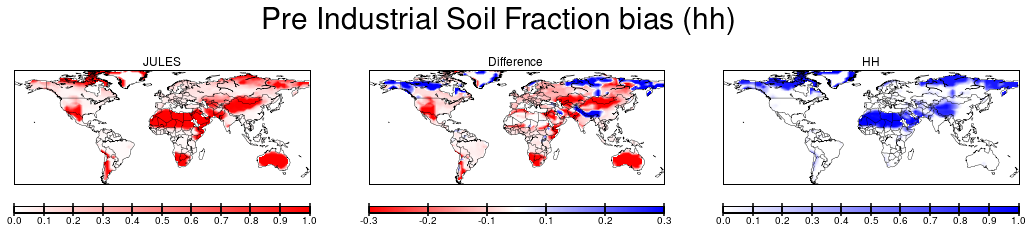

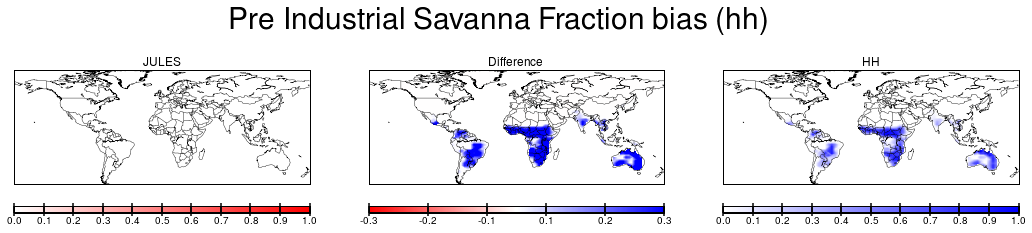

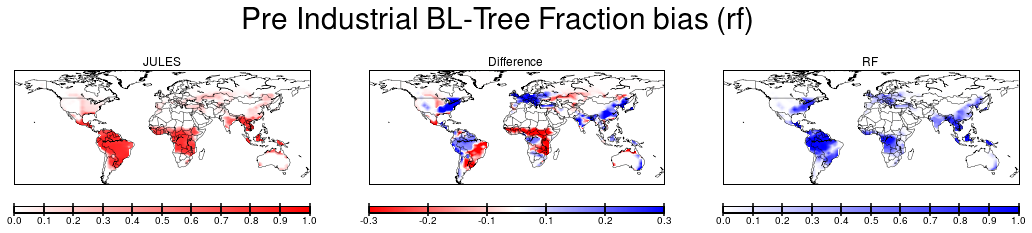

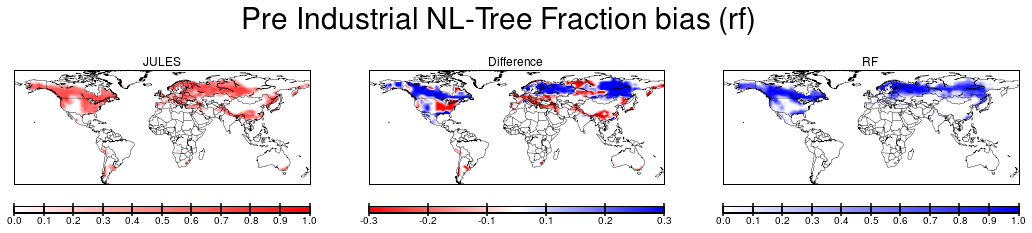

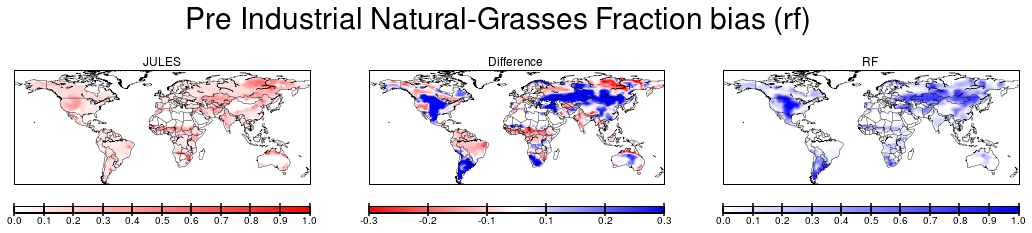

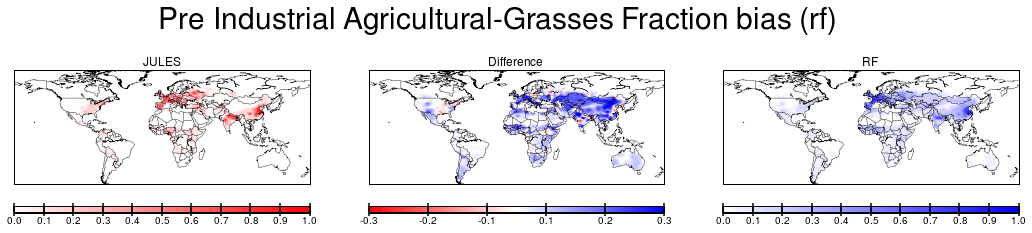

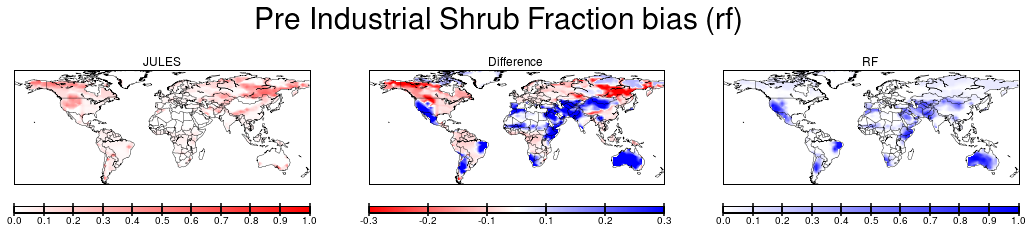

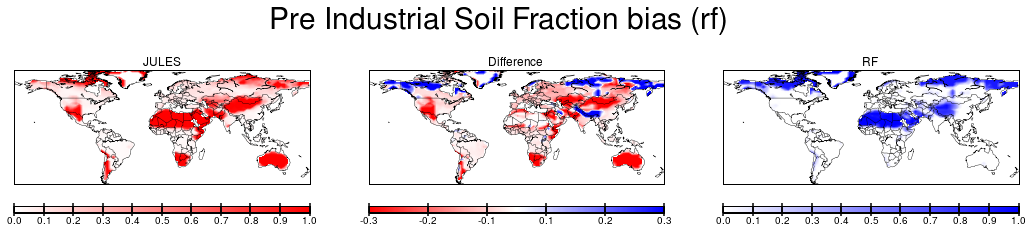

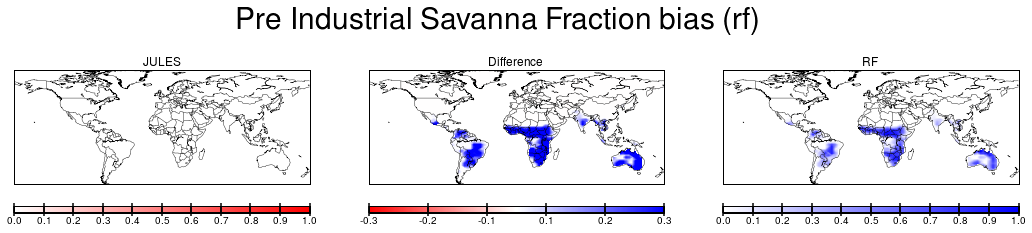

In [15]:
nPLOTtiles=nGROUPS   #  don't plot Ice len(plotTiles_locs)

# plot frac, and frac differences:
DATA_RANGE=[0,1]
DIFF_RANGE=[-0.3,0.3]
nticks=11
nticksdiff=6
pad=0.05; fraction=0.05

for obs in OBS_list:
    for iGRP in range(nGROUPS):
        group=JULES_LCgroups[iGRP]
        # plot Pre industrial fractions
        fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(18,4))
        
        # Plot JULES data in left axis
        ax=axes[0]
        tile=group
        JULES_data=JULES_FRAC_DICT[group]
        plot_data=np.ma.masked_array(JULES_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE='JULES',AXIS=ax,
                           FONTSIZES=[10,8,10,12]                )
        
        # Plot OBS data in right axis
        ax=axes[2]
        tile=group
        OBS_data=OBS_FRAC_DICT[obs][group]
        plot_data=np.ma.masked_array(OBS_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE=obs.upper(),AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
        
        # Plot OBS data in right axis
        ax=axes[1]
        tile=group
        DIFF_data=OBS_data-JULES_data
        plot_data=np.ma.masked_array(DIFF_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DIFF_RANGE,
                           COLOURS=['red','white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticksdiff,
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE='Difference',AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
    
        fig.suptitle('Pre Industrial '+group+' Fraction bias ('+obs+')',fontsize=30)
        fig.savefig(PLOT_DIR+'CoverFractionsGrouped_PreIndustrialBias_'+obs+'.png')
        fig.savefig(PLOT_DIR+'CoverFractionsGrouped_PreIndustrialBias_'+obs+'.eps')

/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


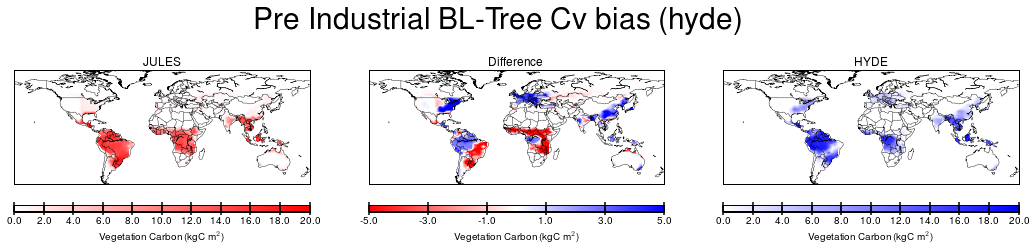

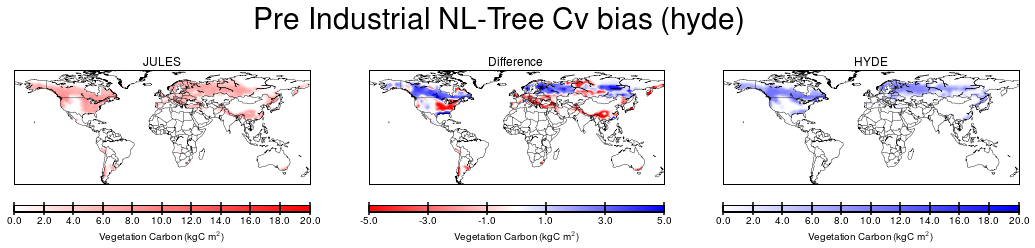

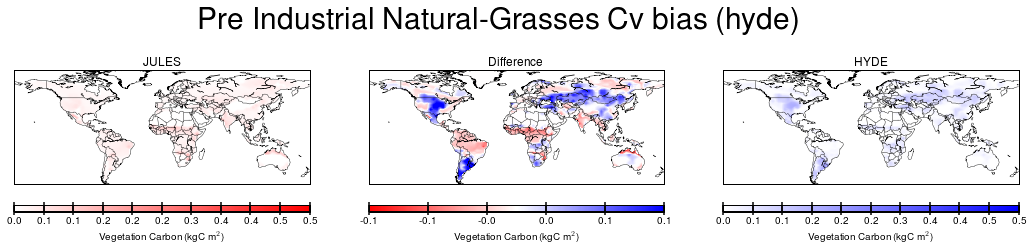

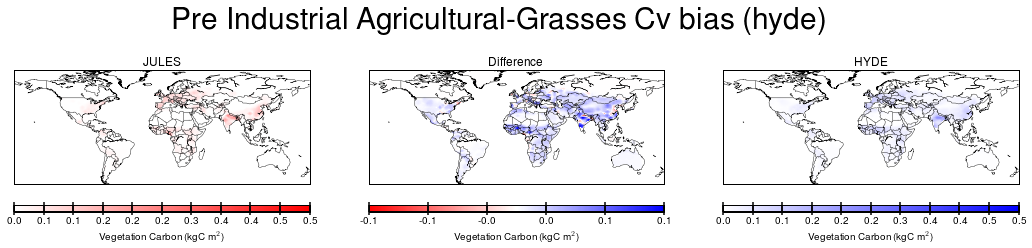

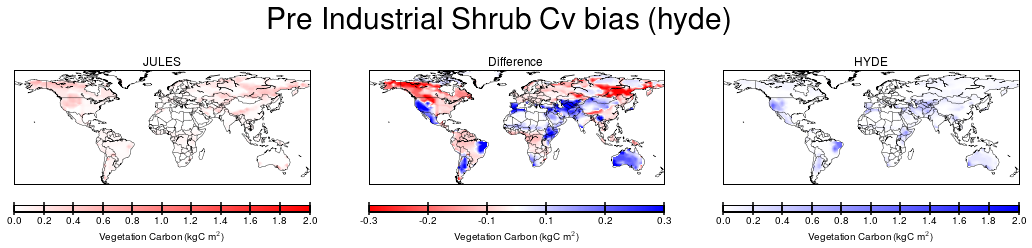

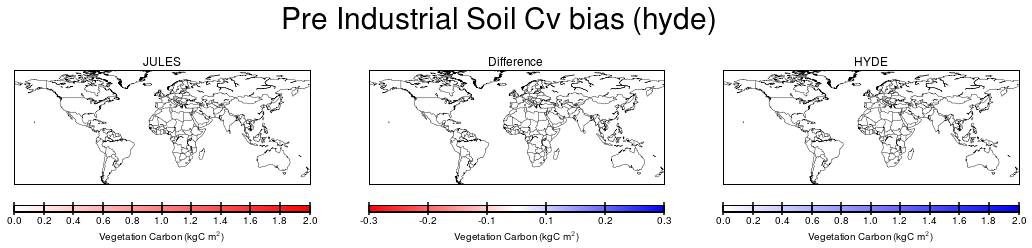

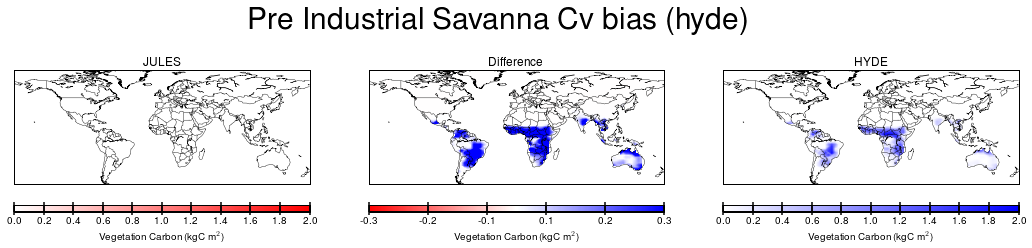

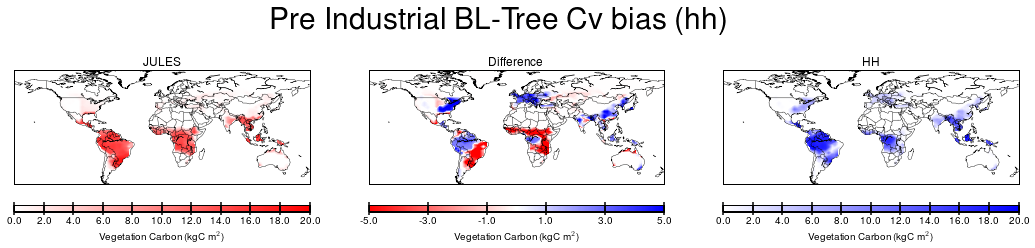

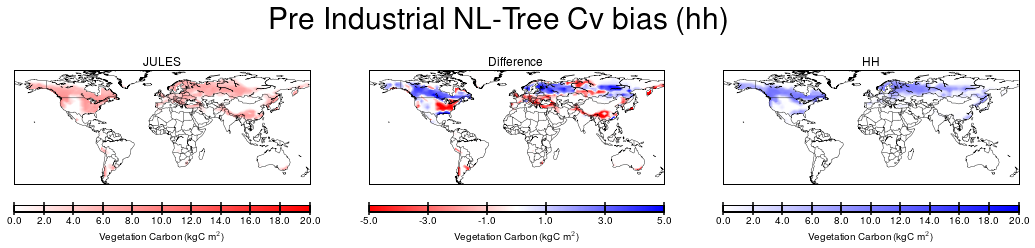

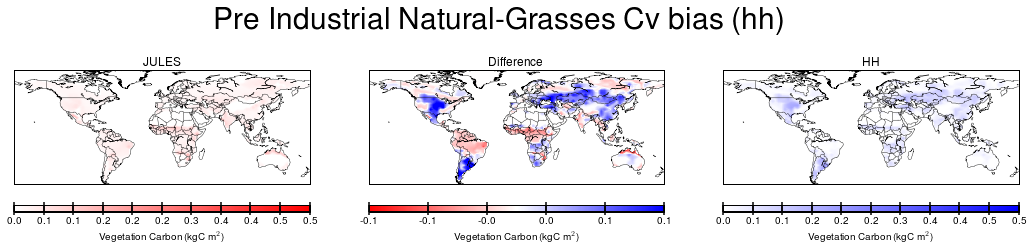

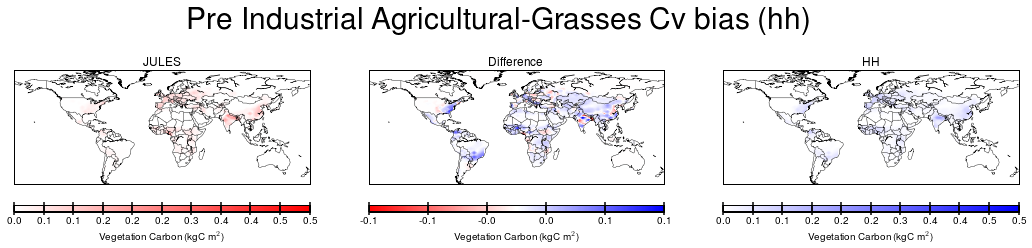

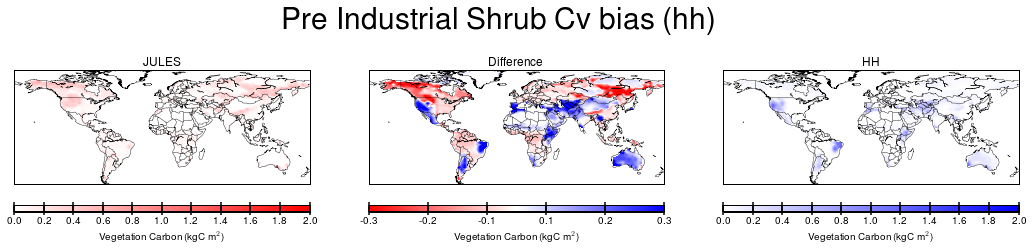

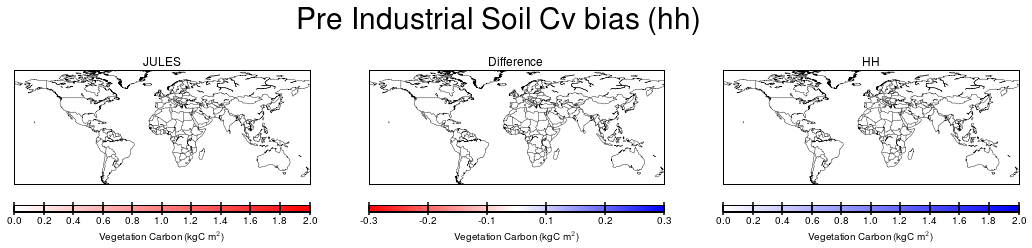

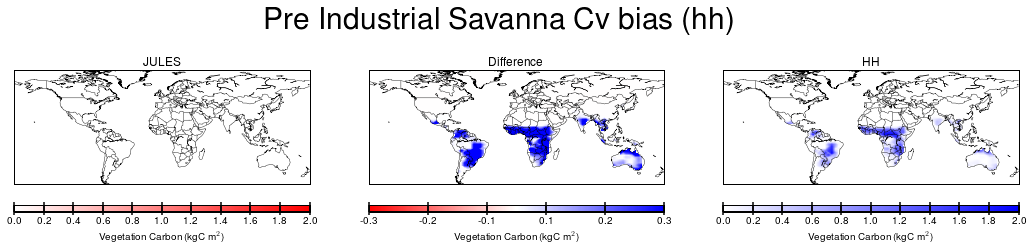

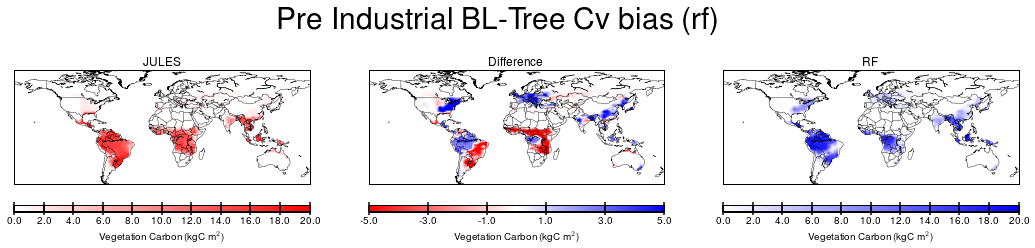

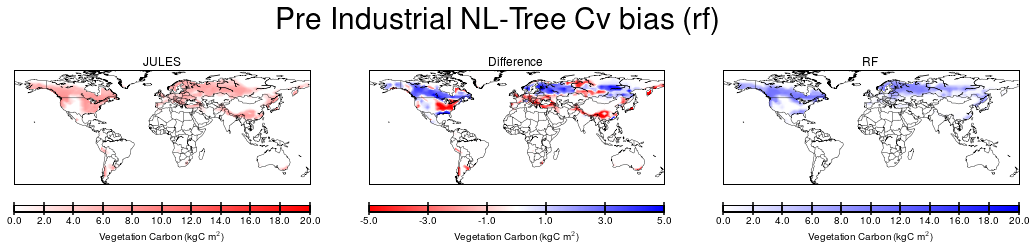

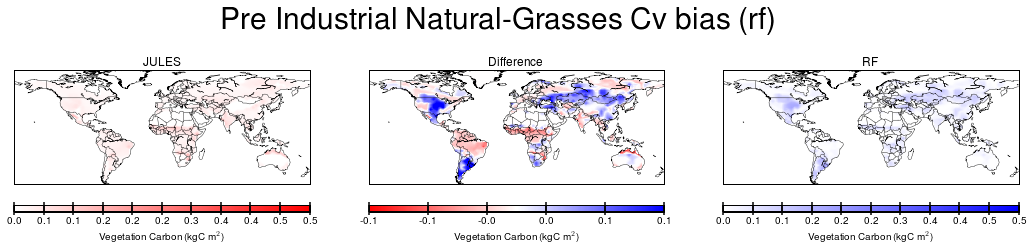

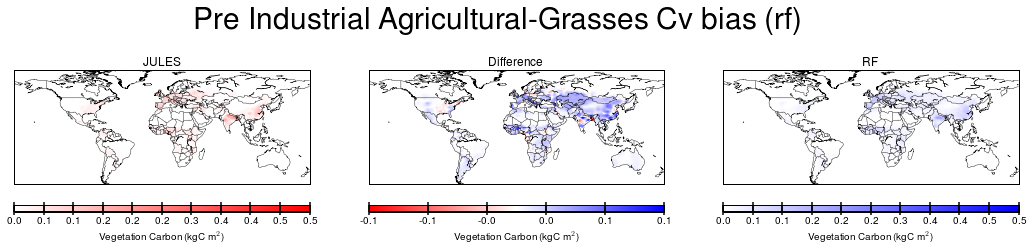

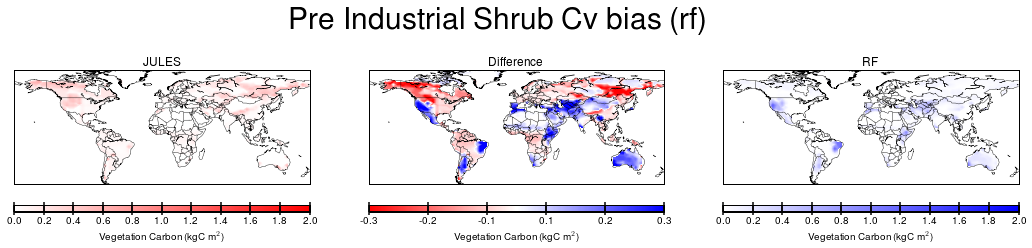

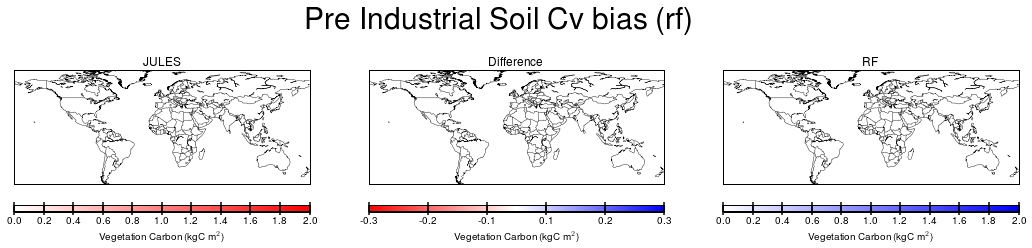

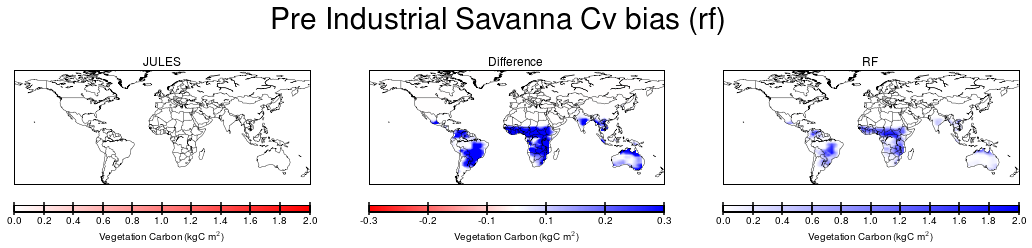

In [17]:
nPLOTtiles=nGROUPS   #  don't plot Ice len(plotTiles_locs)

# plot CV, and CV differences:
DATA_RANGE=[0,10]
DIFF_RANGE=[-5,5]
nticks=11
nticksdiff=6
pad=0.05; fraction=0.05

for obs in OBS_list:
    for iGRP in range(nGROUPS):
        
        group=JULES_LCgroups[iGRP]
        if 'Tree' in group:
            DATA_RANGE=[0,20]
            DIFF_RANGE=[-5,5]
        elif 'Grasses' in group:
            DATA_RANGE=[0,0.5]
            DIFF_RANGE=[-0.1,0.1]
        else:
            DATA_RANGE=[0,2]
            DIFF_RANGE=[-0.3,0.3]
        # plot Pre industrial fractions
        fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(18,4))
        
        # Plot JULES data in left axis
        ax=axes[0]
        tile=group
        JULES_data=JULES_absCV_DICT[group]
        plot_data=np.ma.masked_array(JULES_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                           CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE='JULES',AXIS=ax,
                           FONTSIZES=[10,8,10,12]                )
        
        # Plot OBS data in right axis
        ax=axes[2]
        tile=group
        OBS_data=OBS_absCV_DICT[obs][group]
        plot_data=np.ma.masked_array(OBS_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DATA_RANGE,
                           COLOURS=['white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                           CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE=obs.upper(),AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
        
        # Plot OBS data in right axis
        ax=axes[1]
        tile=group
        DIFF_data=OBS_data-JULES_data
        plot_data=np.ma.masked_array(DIFF_data[land_index],mask=land_index.mask)
        # Plot Preindustrial
        IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                           DATA_RANGE=DIFF_RANGE,
                           COLOURS=['red','white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticksdiff,
                           CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                           RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                           PLOT_TITLE='Difference',AXIS=ax,
                           FONTSIZES=[10,8,10,12]
                          )
    
        fig.suptitle('Pre Industrial '+group+' Cv bias ('+obs+')',fontsize=30)
        fig.savefig(PLOT_DIR+'CV'+group+'_PreIndustrialBias_'+obs+'.png')
        fig.savefig(PLOT_DIR+'CV'+group+'_PreIndustrialBias_'+obs+'.eps')

In [18]:
TOTAL_CV_BIAS = { obs:np.zeros_like(JULES_absCV_DICT['BL-Tree']) for obs in OBS_list }
TOTAL_JULES_CV = np.zeros_like(JULES_absCV_DICT['BL-Tree'])
TOTAL_OBS_CV   = { obs:np.zeros_like(JULES_absCV_DICT['BL-Tree']) for obs in OBS_list }

for iGRP in range(nGROUPS):
    group = JULES_LCgroups[iGRP]
    TOTAL_JULES_CV+=JULES_absCV_DICT[group]
    
    for obs in OBS_list:
        TOTAL_OBS_CV[obs]+=OBS_absCV_DICT[obs][group]
        TOTAL_CV_BIAS[obs]+=JULES_absCV_DICT[group]-OBS_absCV_DICT[obs][group]
    
    

In [19]:
print(np.sum( (TOTAL_JULES_CV-TOTAL_OBS_CV[obs])*AREA_1D )*1e-12 ) 

118.500169023


In [20]:
if True:
    print(TOTAL_JULES_CV-PI_cvtot)

[ -1.00144967e-04  -1.77883044e-04  -2.08388188e-04 ...,  -7.54130980e-10
  -4.22108570e-10  -7.54130980e-10]


In [21]:
PI_cvtot.shape

(1631,)

hyde
hh
rf


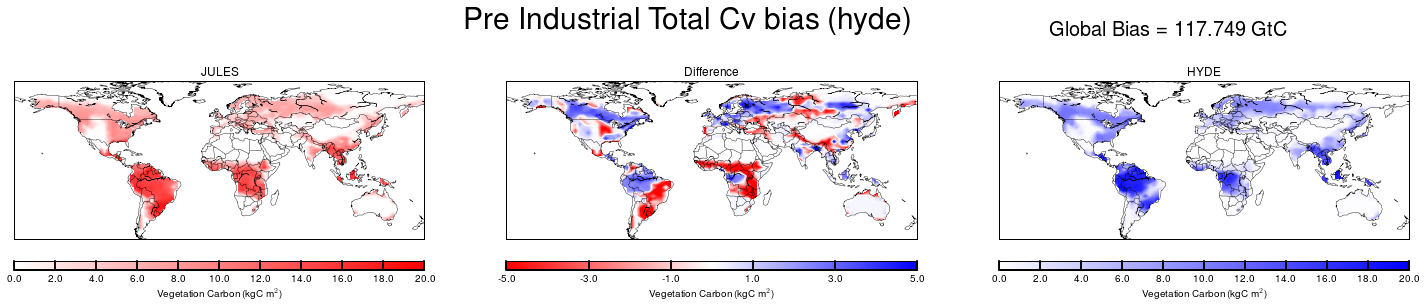

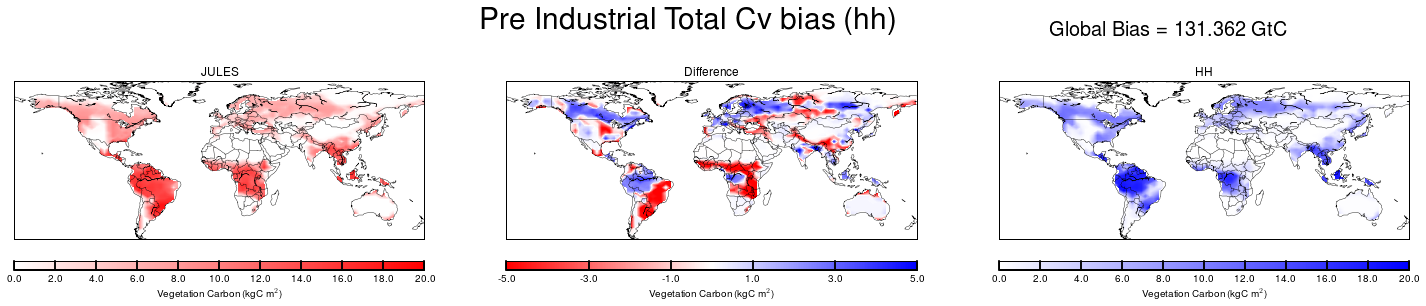

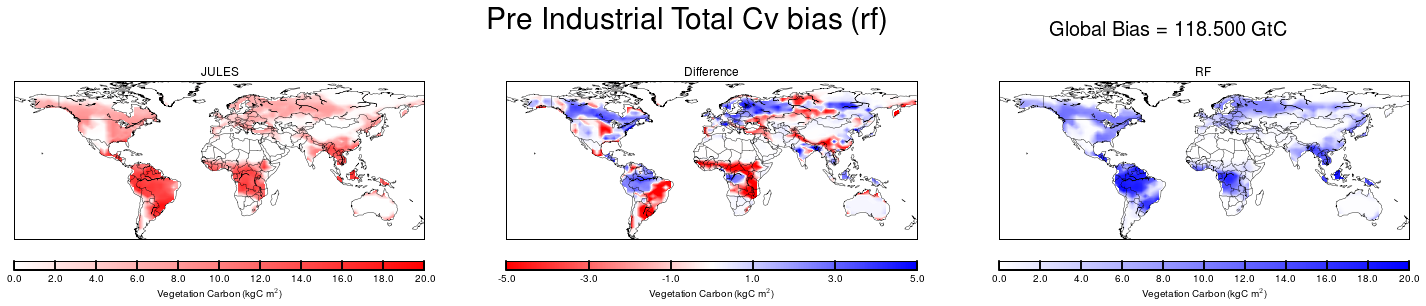

In [22]:
# plot CV, and CV differences:
DATA_RANGE=[0,20]
DIFF_RANGE=[-5,5]
nticks=11
nticksdiff=6
pad=0.05;
fraction=0.05


for obs in OBS_list:
    print(obs)
    fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(25,5))
    
    # Plot JULES data in left axis
    ax=axes[0]
    tile=group
    JULES_data=TOTAL_JULES_CV
    plot_data=np.ma.masked_array(JULES_data[land_index],mask=land_index.mask)   
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                       DATA_RANGE=DATA_RANGE,
                       COLOURS=['white','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                       CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                       RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                       PLOT_TITLE='JULES',AXIS=ax,
                       FONTSIZES=[10,8,10,12]                )
    # Plot OBS data in right axis
    ax=axes[2]
    tile=group
    OBS_data=TOTAL_OBS_CV[obs]
    plot_data=np.ma.masked_array(OBS_data[land_index],mask=land_index.mask)
    # Plot Preindustrial
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                       DATA_RANGE=DATA_RANGE,
                       COLOURS=['white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                       CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                       RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                       PLOT_TITLE=obs.upper(),AXIS=ax,
                       FONTSIZES=[10,8,10,12]
                      )
    
    # Plot OBS data in right axis
    ax=axes[1]
    tile=group
    DIFF_data=-TOTAL_CV_BIAS[obs]
    plot_data=np.ma.masked_array(DIFF_data[land_index],mask=land_index.mask)
    # Plot Preindustrial
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                       DATA_RANGE=DIFF_RANGE,
                       COLOURS=['red','white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticksdiff,
                       CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                       RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                       PLOT_TITLE='Difference',AXIS=ax,
                       FONTSIZES=[10,8,10,12]
                      )
    
    fig.suptitle('Pre Industrial Total Cv bias ('+obs+')',fontsize=30)
    fig.text(0.7,0.9,'Global Bias = %8.3f'%(np.sum(TOTAL_CV_BIAS[obs]*AREA_1D)*1e-12)+' GtC',fontsize=20)
    fig.savefig(PLOT_DIR+'CVTotal_PreIndustrialBias_'+obs+'.png')
    fig.savefig(PLOT_DIR+'CVTotal_PreIndustrialBias_'+obs+'.eps')
    

In [23]:
AGRIC_indexes=[6,7,9,10]
PD_TotAgric = np.zeros_like(PD_frac[0,:])
PI_TotAgric = np.zeros_like(PI_frac[0,:])
for index in AGRIC_indexes:
    PD_TotAgric+=PD_frac[index,:]
    PI_TotAgric+=PI_frac[index,:]

Delta_Agric = PD_TotAgric-PI_TotAgric
print(Delta_Agric.shape)

(1631,)


hyde
hh
rf


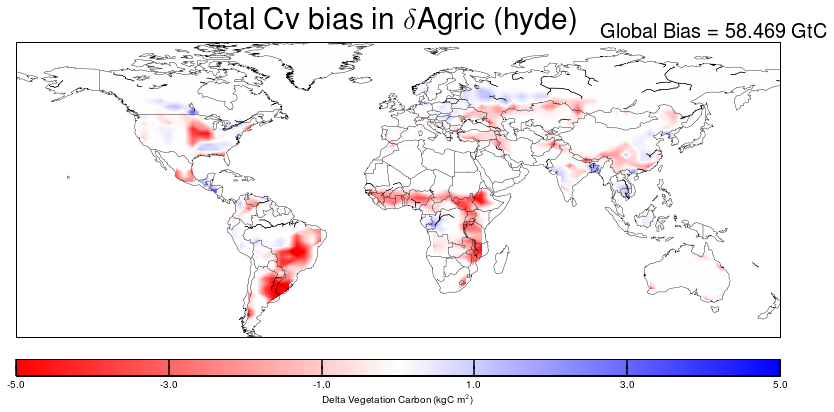

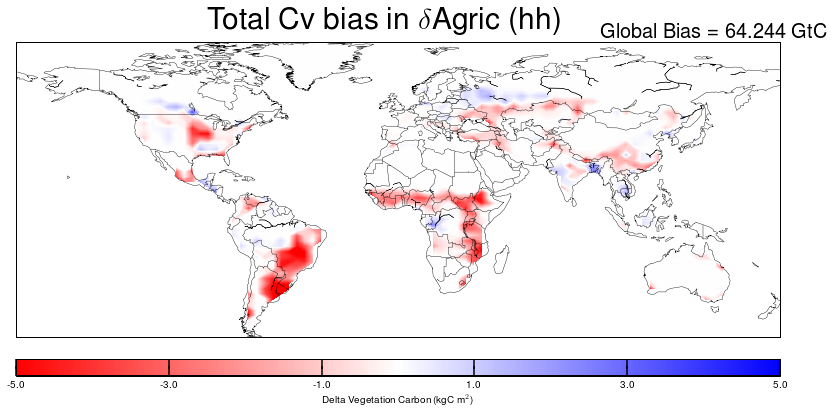

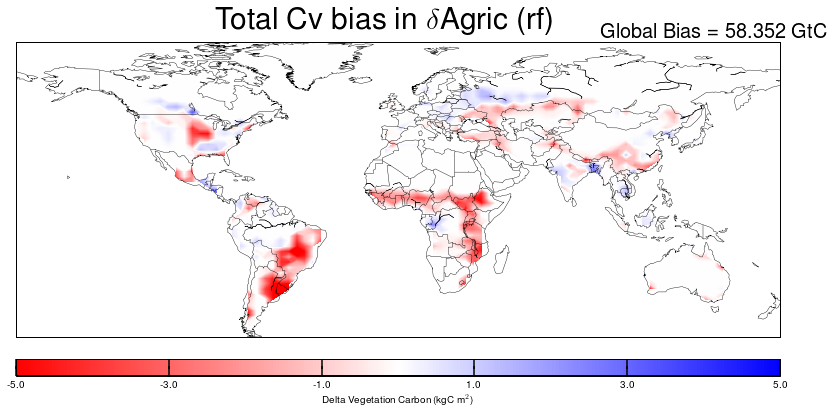

In [24]:
# plot CV, and CV differences:
DATA_RANGE=[0,20]
DIFF_RANGE=[-5,5]
#DIFF_RANGE=[0.,0.5]
nticks=11
nticksdiff=6
pad=0.05;
fraction=0.05


for obs in OBS_list:
    print(obs)
    fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(15,6))
        
    # Plot OBS data in right axis
    tile=group
    DIFF_data=-TOTAL_CV_BIAS[obs]*Delta_Agric
    #DIFF_data=Delta_Agric
    plot_data=np.ma.masked_array(DIFF_data[land_index],mask=land_index.mask)
    # Plot Preindustrial
    IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                       DATA_RANGE=DIFF_RANGE,
                       COLOURS=['red','white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticksdiff,
                       CBAR_LABEL='Delta Vegetation Carbon (kgC m$^2$)',
                       RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                       AXIS=axes,
                       FONTSIZES=[10,8,10,12]
                      )
    
    fig.suptitle('Total Cv bias in $\delta$Agric ('+obs+')',fontsize=30)
    fig.text(0.7,0.91,'Global Bias = %8.3f'%(np.sum(TOTAL_CV_BIAS[obs]*Delta_Agric*AREA_1D)*1e-12)+' GtC',fontsize=20)
    fig.savefig(PLOT_DIR+'CVTotal_PresentDayAgriculturalBias_'+obs+'.png')
    fig.savefig(PLOT_DIR+'CVTotal_PresentDayAgriculturalBias_'+obs+'.eps')
    

In [24]:
print(Delta_Agric)
print(plot_data.shape)

[ 0.09858529  0.21613821  0.57124478 ...,  0.          0.          0.        ]
(56, 96)


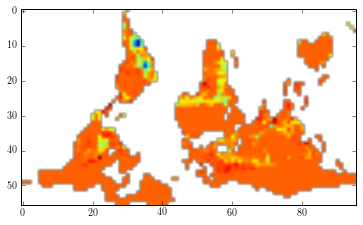

In [25]:
plt.imshow(plot_data)